# Building an SVM Using sci-kit learn - Lab

## Introduction

In the previous lab, you learned how to build an SVM from scratch. Here, you'll learn how to use sci-kit learn to create SVMs!

## Objectives

You will be able to:
- Use sci-kit learn to build a linear SVM when there are 2 groups
- Use sci-kit learn to build a linear SVM when there are more than 2 groups

## Generate four data sets in sci-kit learn

To start, here's some code using the sci-kit learn dataset generator again. 
- The first data set contains the same blobs as for the first SVM in the last lab
- The second data set contains the same blobs as for the second SVM (Soft Margin Classifier) in the last lab
- The third data set contains four separate blobs
- The fourth data set contains slightly different data with two classes, but using the make_moons generator instead of blobs.

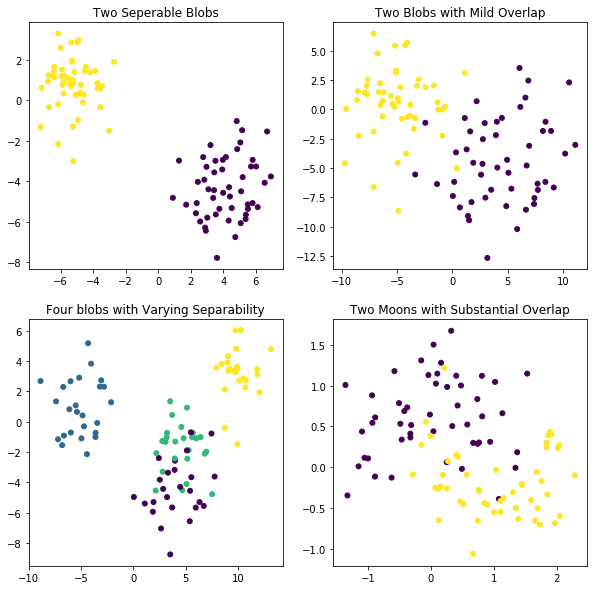

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.title("Two Seperable Blobs")
X_1, y_1 = make_blobs(n_features = 2, centers = 2, cluster_std=1.25, random_state = 123)
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_1, s=25)

plt.subplot(222)
plt.title("Two Blobs with Mild Overlap")
X_2, y_2 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3,  random_state = 123)
plt.scatter(X_2[:, 0], X_2[:, 1], c = y_2, s=25)

plt.subplot(223)
plt.title("Four blobs with Varying Separability")
X_3, y_3 = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)
plt.scatter(X_3[:, 0], X_3[:, 1], c = y_3, s=25)

plt.subplot(224)
plt.title("Two Moons with Substantial Overlap")
X_4, y_4 = make_moons(n_samples=100, shuffle = False , noise = 0.3, random_state=123)
plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)

plt.show()

## A model for a perfectly linearly separable data set

Let's have a look at our first plot again. 

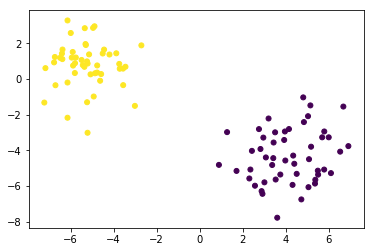

In [2]:
X_1, y_1 = make_blobs(n_features = 2, centers = 2, cluster_std=1.25, random_state = 123)
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_1, s=25);

Now it's time to fit a simple linear support vector machine on this data. The process is very similar to other sci-kit learn models: import the class, instantiate, fit and predict.
- import svm from sci-kit learn
- save the SVC-method (which stands for Support Vector Classification) with `kernel='linear'` as the only argument.
- call the `.fit()` method with the data as the first argument and the labels as the second. 

> Note: Typically you should scale data when fitting an SVM model. This is because if some variables have a larger scale than others, they will dominate variables that are on a smaller scale. To read more about this, check out page 3 of [this paper](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf). Because these variables are all on a similar scale, we will not apply standardization. However, when performing SVM on a real-world dataset, you should ALWAYS scale the data before fitting a model. 


In [3]:
# Your code here
from sklearn.svm import SVC
method = SVC(kernel='linear')
method.fit(X_1, y_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Save the first feature (on the horizontal axis) as X_11 and the second feature (on the vertical axis) as X_12.

In [4]:
# Your code here
X_11= X_1[:,0]
X_12= X_1[:,1]

In [12]:
# Your code here
X_11.min()

-7.2278320238049725

When we create plots for the classifier later, we're going to want appropriate scale for the axes. In order to do this, we should see what the minimum and maximum values are for the horizontal and vertical axes. To make the plots not feel cramped, we should subtract the minimum by 1 and add 1 to the maximum. Save these values as X11_min , X11_max, X12_min, and X12_max.

In [13]:
# Your code here
X11_min = X_11.min() - 1
X11_max = X_11.max() + 1
X12_min = X_12.min() -1 
X12_max = X_12.max() + 1

Next, use NumPy's `linspace()` method to generate evenly spaced points between these adjusted min and max values for both X_11 and X_12. Generating 10 points along each is sufficient.

In [14]:
x11_coord = np.linspace(X11_min, X11_max, 10)#Your code here
x12_coord = np.linspace(X12_min, X12_max, 10)# Your code here

Now, you'll create an entire grid of points by combining these two arrays using NumPy's `meshgrid()` method. It's a very straightforward method, but feel free to pull up the documentation if you haven't worked with it before.

In [15]:
X12_C, X11_C = np.meshgrid(x11_coord, x12_coord)# Your code here

Finally, you need to reshape the outputs from `meshgrid()` to create a numpy array of the shape (100, 2) that concatenates the coordinates for X11 and X12 together in one numpy object. Use `np.c_` and make sure to use `.ravel()` first. Use `np.shape()` on your resulting object first to verify the resulting shape.

In [18]:
x11x12 = np.c_[X11_C.ravel(), X12_C.ravel()]

np.shape(x11x12)

(100, 2)

Great! Now we want to get a decision boundary for this particular data set. Use `clf.decision_function()` with your (100,2). It will return the distance to the samples that you generated using `np.meshgrid()`. Make sure you change your shape in a way that you get a (10,10) numpy array. *We need to reshape this numpy array because it must be a 2-dimensional shape to function with the `countour()` method you will use in the next plot.*

In [23]:
# Your code here
df1 = method.decision_function(x11x12)
df1 = df1.reshape(X12_C.shape)


Now, let's plot our data again with the result of SVM in it. 
- The first line is simply creating the scatter plot like before
- Next, you need to specify that what you will do next uses the same axes as the scatter plot. You can do this using `plt.gca()`. Store it in an object and for the remainder you'll use this object to create the lines in your plot
- Use `.countour()`. The first two argument are the coordinates created usiung the meshgrid, the third argument the result of your decision function call. 
- You'll want three lines: one decision boundary, and the 2 lines going through the support vectors. Incluse `levels = [-1,0,1]` to get all three.

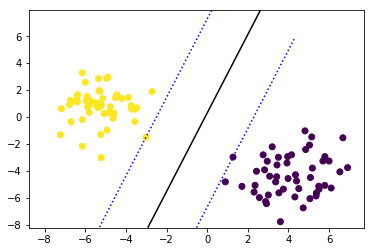

In [24]:
# Your code here
plt.scatter(X_11, X_12, c = y_1)
axes = plt.gca()
axes.contour(X11_C, X12_C, df1, colors=["blue","black","blue"], levels= [-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()

The coordinates of the support vectors can be found in the `support_vectors_`-attribute. Have a look:

In [26]:
# Your code here

method.support_vectors_

array([[ 1.27550827, -2.97755444],
       [-3.01370675, -1.50501182]])

Now create your plot again but highlight your support vectors. 

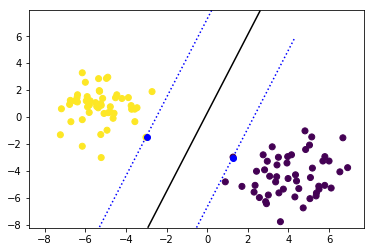

In [27]:
# Your code here
plt.scatter(X_11, X_12, c = y_1)
plt.scatter(method.support_vectors_[0], method.support_vectors_[1], color='blue')
axes = plt.gca()
axes.contour(X11_C, X12_C, df1, colors=["blue","black","blue"], levels= [-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()

## When the data is not linearly separable

The previous example was pretty easy. The 2 "clusters" were easily separable by one straight line classifying every single instance correctly. But what if this isn't the case? Plot the second dataset again.

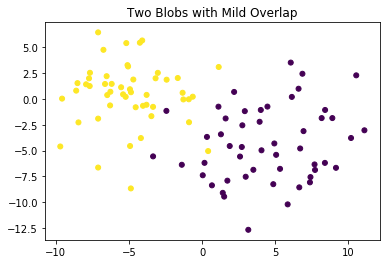

In [28]:
# Your code here
plt.title("Two Blobs with Mild Overlap")
X_2, y_2 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3,  random_state = 123)
plt.scatter(X_2[:, 0], X_2[:, 1], c = y_2, s=25)


The sci-kit learn SVC function you used above automatically allows for slack variables. As such, simply repeat the code to fit the SVM model and plot the decision boundary.

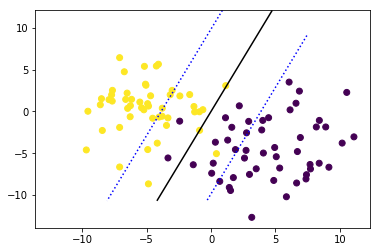

In [29]:
# Your code here
method = SVC(kernel='linear')
method.fit(X_2, y_2)

X_21= X_2[:,0]
X_22= X_2[:,1]

X21_min = X_21.min() - 1
X21_max = X_21.max() + 1
X22_min = X_22.min() -1 
X22_max = X_22.max() + 1

x21_coord = np.linspace(X21_min, X21_max, 10)
x22_coord = np.linspace(X22_min, X22_max, 10)

X22_C, X21_C = np.meshgrid(x21_coord, x22_coord)
x21x22 = np.c_[X21_C.ravel(), X22_C.ravel()]

df2 = method.decision_function(x21x22)
df2 = df2.reshape(X22_C.shape)

plt.scatter(X_21, X_22, c = y_2)
axes = plt.gca()
axes.contour(X21_C, X22_C, df1, colors=["blue","black","blue"], levels= [-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()


As you can see, 3 instances are misclassified (1 yellow, 2 purple). It may not possible to improve this, but it's worth experimenting with changing your hyperparameter C, which can be done when initializing the classifier. Try it out now; reinstantiate a model object , adding a high value for the argument `C`. Specifically, set C = 5,000,000. Then refit the classifier and draw the updated decision boundary.

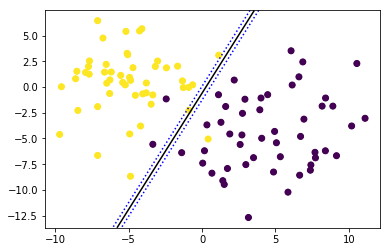

In [32]:



plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, s=25)

from sklearn import svm

clf = svm.SVC(kernel='linear', C = 5000000) 
clf.fit(X_2, y_2)

X_21= X_2[:,0]
X_22= X_2[:,1]
X21_min, X21_max = X_21.min() - 1, X_21.max() + 1
X22_min, X22_max = X_22.min() - 1, X_22.max() + 1

x21_coord = np.linspace(X21_min, X21_max, 10)
x22_coord = np.linspace(X22_min, X22_max, 10)

X22_C, X21_C = np.meshgrid(x22_coord, x21_coord)

x21x22 = np.c_[X21_C.ravel(), X22_C.ravel()]

df2 = clf.decision_function(x21x22)
df2= df2.reshape(X21_C.shape)

plt.scatter(X_21, X_22, c = y_2)
axes = plt.gca()
axes.contour(X21_C, X22_C, df2, colors=["blue","black","blue"], levels= [-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()


## Other options in sci-kit learn



If you dig deeper into sci-kit learn, you'll notice that there are several ways to create linear SVM's for classification:

- `svm.SVC(kernel = "linear")` , what you've used above. Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). 
- `svm.LinearSVC()`, which is very similar to the simple SVC method, but:
    - Does not allow for the keyword "kernel", as it is assumed to be linear (more on non-linear kernels later)
    - In the objective function, `LinearSVC` minimizes the squared hinge loss while `SVC` minimizes the regular hinge loss.
    - `LinearSVC` uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while `SVC` uses the One-vs-One multiclass reduction (this is important only when having >2 classes!)
- `svm.NuSVC()`, which is again very similar,
    - Does have a "kernel" argument
    - `SVC` and `NuSVC` are essentially the same thing, except that for `nuSVC`, C is reparametrized into nu. The advantage of this is that where C has no bounds and can be any positive number, nu always lies between 0 and 1. 
    - One-vs-one multiclass approach.
    
    
So what does One-vs-one mean? what does One-vs-all mean?
- One-vs-one means that with $n$ classes, $\dfrac{(n)*(n-1)}{2}$ boundaries are constructed! 
- One-vs-all means that when there are $n$ classes, $n$ boundaries are created.

The difference between these three types of classifiers is mostly small, but generally visible for data sets with 3+ classes. Have a look at our third example and see how the results differ!

## Classifying four classes

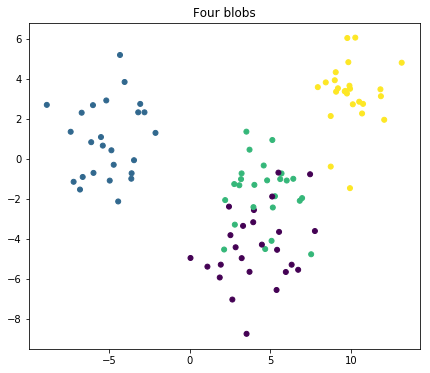

In [33]:
plt.figure(figsize=(7, 6))

plt.title("Four blobs")
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25);

Try four different models and plot the results using subplots where:
    - The first one is a regular SVC (C=1)
    - The second one is a regular SVC with C=0.1
    - The third one is a NuSVC with nu= 0.7
    - The fourth one is a LinearSVC (no arguments)
    
Make sure all these plots have highlighted support vectors, except for LinearCSV (this algorithm doesn't have the attribute `.support_vectors_`.   
Additionally, be sure to use `contourf()`, instead of `contour()` to get filled contour plots.

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


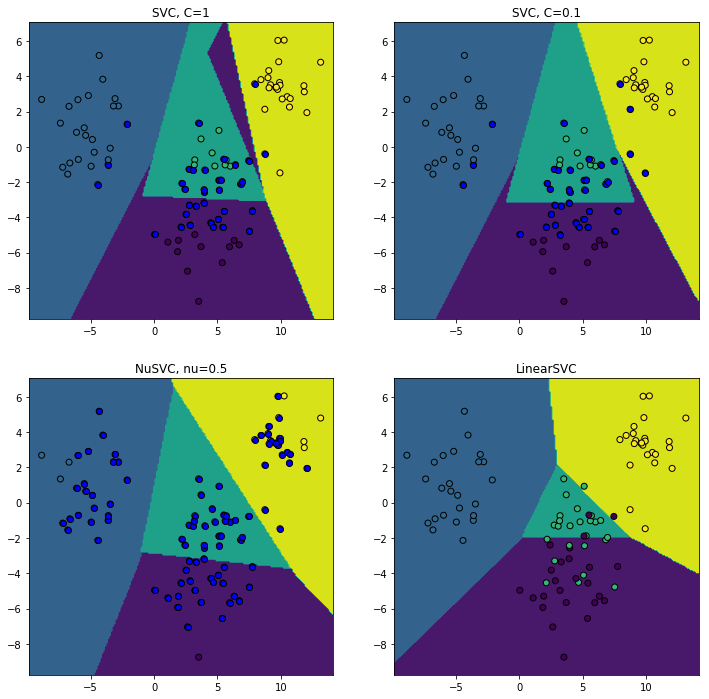

In [34]:
# Your code here

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

clf1 = svm.SVC(kernel = "linear",C=1) 
clf1.fit(X, y)
Z1 = clf1.predict(x1x2).reshape(X1_C.shape)

clf2 = svm.SVC(kernel = "linear",C=0.1) 
clf2.fit(X, y)
Z2 = clf2.predict(x1x2).reshape(X1_C.shape)

clf3 = svm.NuSVC(kernel = "linear",nu=0.7) 
clf3.fit(X, y)
Z3 = clf3.predict(x1x2).reshape(X1_C.shape)

clf4 = svm.LinearSVC() 
clf4.fit(X, y)
Z4 = clf4.predict(x1x2).reshape(X1_C.shape)

### 
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.title("SVC, C=1")
axes = plt.gca()
axes.contourf(X1_C, X2_C, Z1, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
axes.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], facecolors='blue', edgecolors= 'k') 

plt.subplot(222)
plt.title("SVC, C=0.1")
axes = plt.gca()
axes.contourf(X1_C, X2_C, Z2, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
axes.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], facecolors='blue', edgecolors= 'k') 

plt.subplot(223)
plt.title("NuSVC, nu=0.5")
axes = plt.gca()
axes.contourf(X1_C, X2_C, Z3, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
axes.scatter(clf3.support_vectors_[:, 0], clf3.support_vectors_[:, 1], facecolors='blue', edgecolors= 'k') 

plt.subplot(224)
plt.title("LinearSVC")
axes = plt.gca()
axes.contourf(X1_C, X2_C, Z4, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
plt.show()

Now, look at the coefficients of the decision boundaries. Remember that a simple `SVC` uses a one-vs-one method. this means that for 4 classes, $\dfrac{(4 * 3)}{2}= 6$ decision boundaries are created. The coefficients can be accessed in the attribute `.coef_`. Compare these with the coefficients for the LinearSVC. What do you notice?

In [22]:
# Your code here

## Non-linear Boundaries

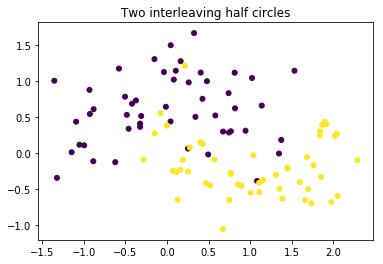

In [20]:
plt.title("Two interleaving half circles")
X_4, y_4 = make_moons(n_samples=100, shuffle = False , noise = 0.3, random_state=123)
plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)

plt.show()

Finally, look at the fourth plot. While you can try and draw a line to separate the classes, it's fairly apparent that a linear boundary is not appropriate. In the next section you'll learn about SVMs with non-linear boundaries!

## Additional reading

It is highly recommended to read up on SVMs in the sci-kit learn documentation!
- https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html

## Summary

In this lesson you explored and practiced how to use sci-kit learn to build linear support vector machines. In the next lesson, you'll learn how SVMs can be extended to have non-linear boundaries.